# CSCI 5481 Homework 2
Prof: Knights

Author: Christopher White

Date: October 11, 2018

In [4]:
import os
from nwalign import *

## Run Command Line

In [5]:
!python nwalign.py -q './Homework 2 - sequences/Human_HOX.fa' -r './Homework 2 - sequences/Fly_HOX.fa' -o 'Output_Full_HOX.txt'

In [6]:
!python nwalign.py -q './Homework 2 - sequences/Human_HOX.fa' -r './Homework 2 - sequences/Fly_HOX.fa' -o 'Output_Match_HOX.txt' -m './Homework 2 - sequences/Match_HOX.txt'

In [7]:
!python nwalign.py -q './Homework 2 - sequences/Human_PAX.fa' -r './Homework 2 - sequences/Fly_PAX.fa' -o 'Output_Full_PAX.txt'

In [8]:
!python nwalign.py -q './Homework 2 - sequences/Human_PAX.fa' -r './Homework 2 - sequences/Fly_PAX.fa' -o 'Output_Match_PAX.txt' -m './Homework 2 - sequences/Match_PAX.txt'

## Read in Sequences and Calculate Scores

In [33]:
human_HOX = read_seq('./Homework 2 - sequences/Human_HOX.fa')
fly_HOX = read_seq('./Homework 2 - sequences/Fly_HOX.fa')
human_PAX = read_seq('./Homework 2 - sequences/Human_PAX.fa')
fly_PAX = read_seq('./Homework 2 - sequences/Fly_PAX.fa')

score_hox,_,_ = find_alignments(human_HOX, fly_HOX)
score_pax,_,_ = find_alignments(human_PAX, fly_PAX)

print('HOX Score: {}'.format(score_hox))
print('PAX Score: {}'.format(score_pax))

HOX Score: -494.0
PAX Score: -850.0


## Run Randomized Alignments

In [41]:
from random import sample
import numpy as np
import pandas as pd
from multiprocessing import Pool

In [50]:
# Create a wrapper for multiprocessing
def random_permute_HOX(i):
    score, _, _ = find_alignments(sample(human_HOX, k=len(human_HOX)),
                                  sample(fly_HOX, k=len(fly_HOX)))
    return score

def random_permute_PAX(i):
    score, _, _ = find_alignments(sample(human_PAX, k=len(human_PAX)),
                                  sample(fly_PAX, k=len(fly_PAX)))
    return score

In [63]:
NUM_ITERS = 10000

p = Pool(processes=8)
score_hox_iter = p.map(random_permute_HOX, [i for i in range(NUM_ITERS)])
score_pax_iter = p.map(random_permute_PAX, [i for i in range(NUM_ITERS)])

score_table = pd.DataFrame({'HOX':score_hox_iter, 'PAX':score_pax_iter})

In [64]:
score_table.head()

,HOX,PAX
0,-636.0,-1300.0
1,-656.0,-1302.0
2,-624.0,-1313.0
3,-645.0,-1296.0
4,-629.0,-1308.0


## Plot Histograms

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt

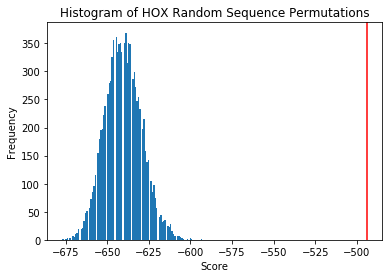

In [69]:
hax = score_table['HOX'].plot.hist(bins=100)
hax.set_title('Histogram of HOX Random Sequence Permutations')
hax.set_xlabel('Score')
hax.vlines(score_hox, 0, 1, transform=hax.get_xaxis_transform(), colors='r')

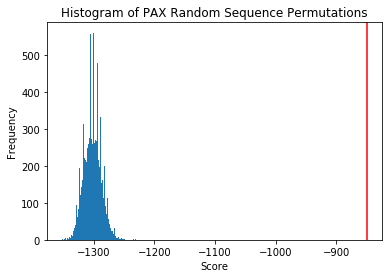

In [70]:
pax = score_table['PAX'].plot.hist(bins=100)
pax.set_title('Histogram of PAX Random Sequence Permutations')
pax.set_xlabel('Score')
pax.vlines(score_pax, 0, 1, transform=pax.get_xaxis_transform(), colors='r')

In [67]:
print('HOX Mean: {}\nHOX Std: {}'.format(score_table['HOX'].mean(), score_table['HOX'].std()))
print('PAX Mean: {}\nPAX Std: {}'.format(score_table['PAX'].mean(), score_table['PAX'].std()))

HOX Mean: -640.4855
HOX Std: 11.026737896806221
PAX Mean: -1302.0103
PAX Std: 14.26688993175573


In [68]:
p.close()